
- date — дата наблюдения;

- country — наименование страны;

- confirmed — общее число зафиксированных случаев на указанный день;

- deaths — общее число зафиксированных смертей на указанный день;

- recovered — общее число выздоровлений на указанный день.

- active - общее число больных на данный момент

- daily_confirmed - число прироста заболевших

- daily_deaths - число прироста умерших

- daily_recovered - число прироста выздоровевших

- total_vaccinations — общее число введённых вакцин в стране на указанный день;

- people_vaccinated — общее число привитых первым компонентом в стране на указанный день;

- people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

- people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

- people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );

- daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);

- vaccines — комбинации вакцин, используемые в стране.

- death_rate — общий процент смертей среди зафиксированных случаев (летальность) и 

- recover_rate — общий процент случаев выздоровления. 

<Axes: xlabel='daily_confirmed_per_hundred', ylabel='country'>

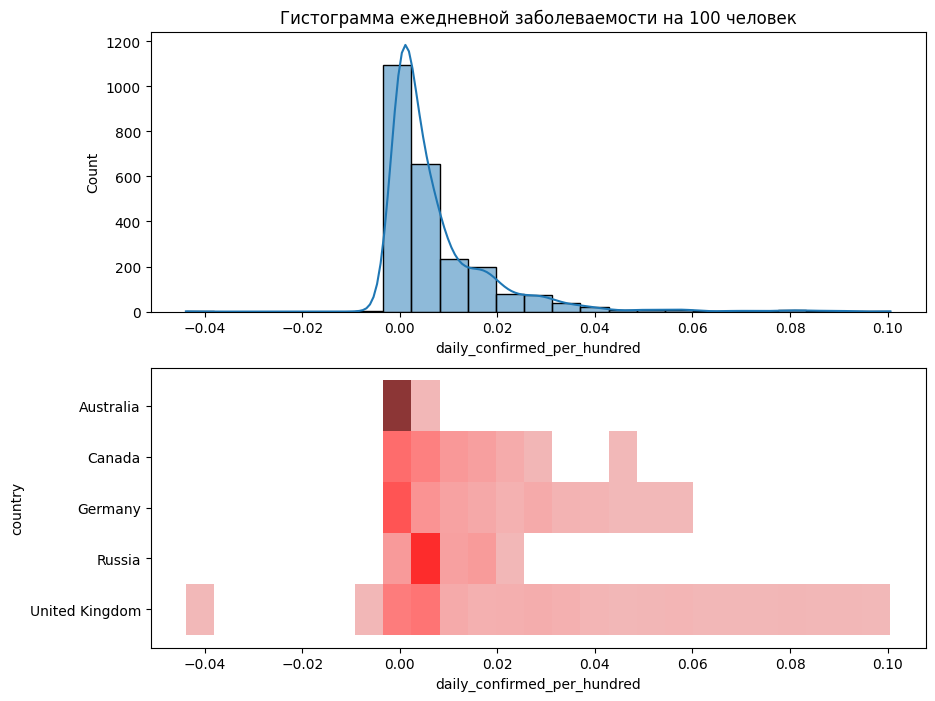

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_df = pd.read_csv('data/covid_dataframe.csv')
covid_df.pop('Unnamed: 0')
covid_df['date'] = pd.to_datetime(covid_df['date'])

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

croped_covid_df = croped_covid_df.merge(populations,how='left',on='country')
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100

fig , axes = plt.subplots(nrows=2,ncols=1,figsize=(10,8))

sns.histplot(
    ax=axes[0],
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    
)
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек')
sns.histplot(
    ax=axes[1],
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red'
)

Основные параметры метода histplot()

- data — DataFrame, по которому строится график;

- x — признак, который будет отложен по оси абсцисс;

- y — признак, который будет отложен по оси ординат;

- hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);

- ax — система координат Matplotlib, в которой строится график;

- color — цвет графика;

- bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);

- kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

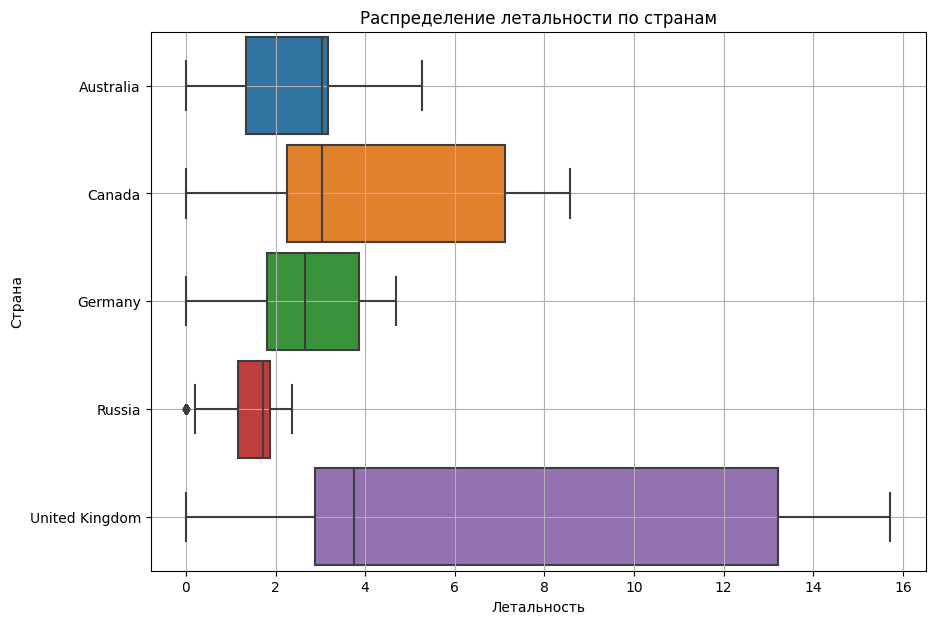

In [3]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='death_rate',
    y='country',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid();

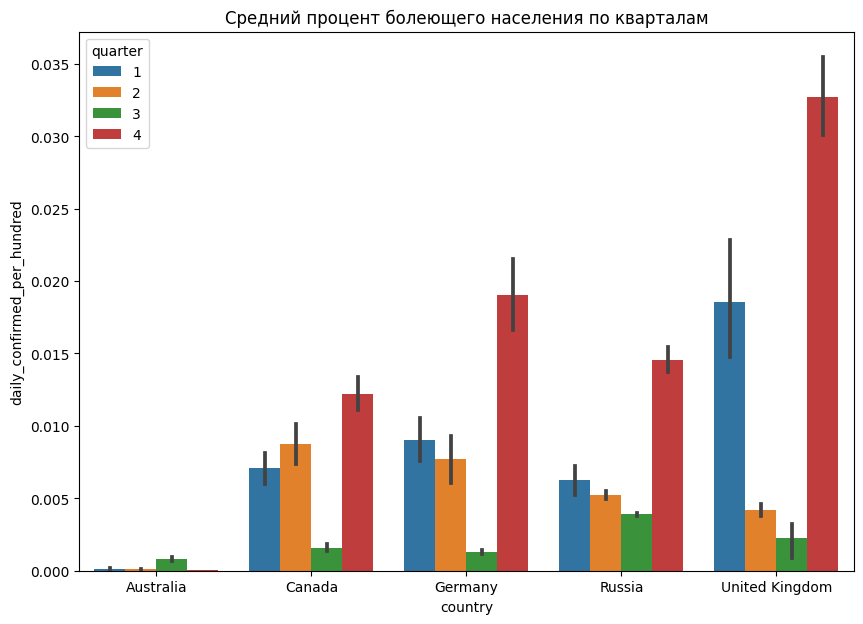

In [4]:
fig = plt.figure(figsize=(10,7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам');

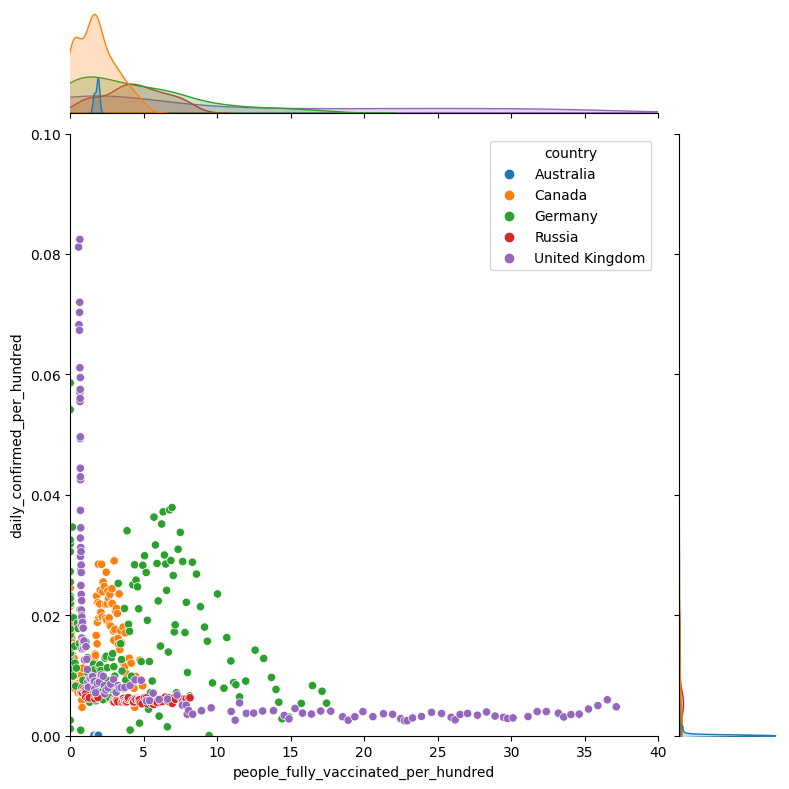

In [5]:
joinplot=sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    height=8,
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1)
)

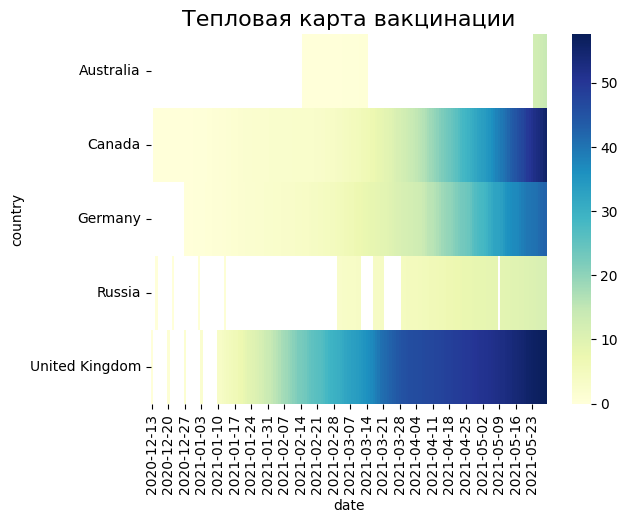

In [6]:
pivot_table= croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country' 
)
pivot_table.columns = pivot_table.columns.astype('string')
heatmap = sns.heatmap(data=pivot_table, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Выберите верные выводы по построенному графику:

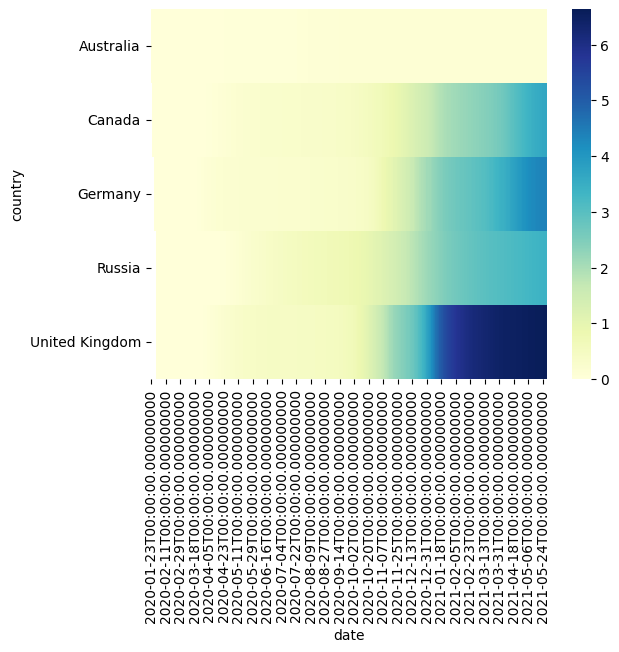

In [7]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

pivot= croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country' 
)
mapt = sns.heatmap(
    data=pivot,
    cmap='YlGnBu'
)

Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

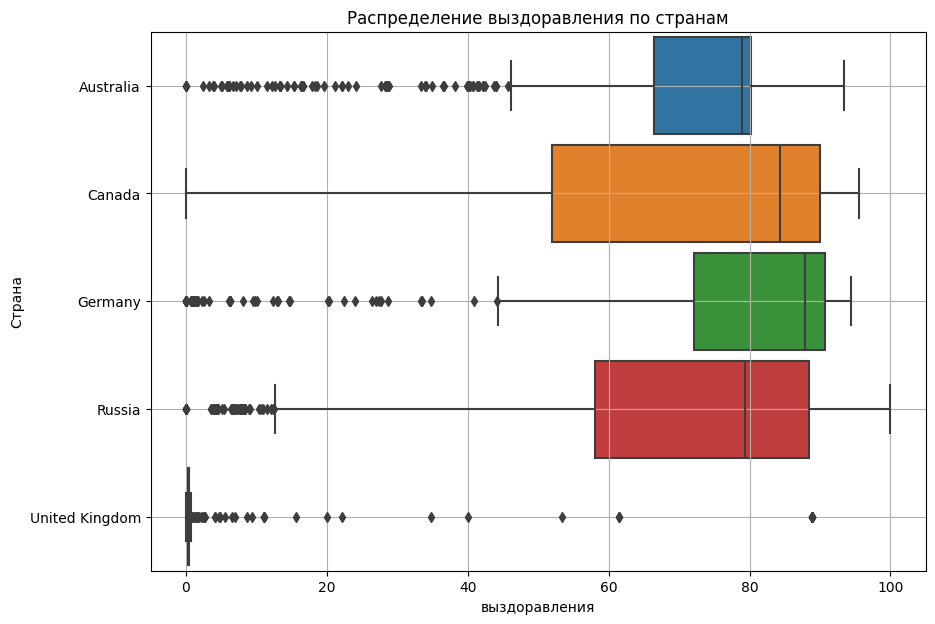

In [8]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='recover_rate',
    y='country',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоравления по странам');
boxplot.set_xlabel('выздоравления');
boxplot.set_ylabel('Страна');
boxplot.grid();

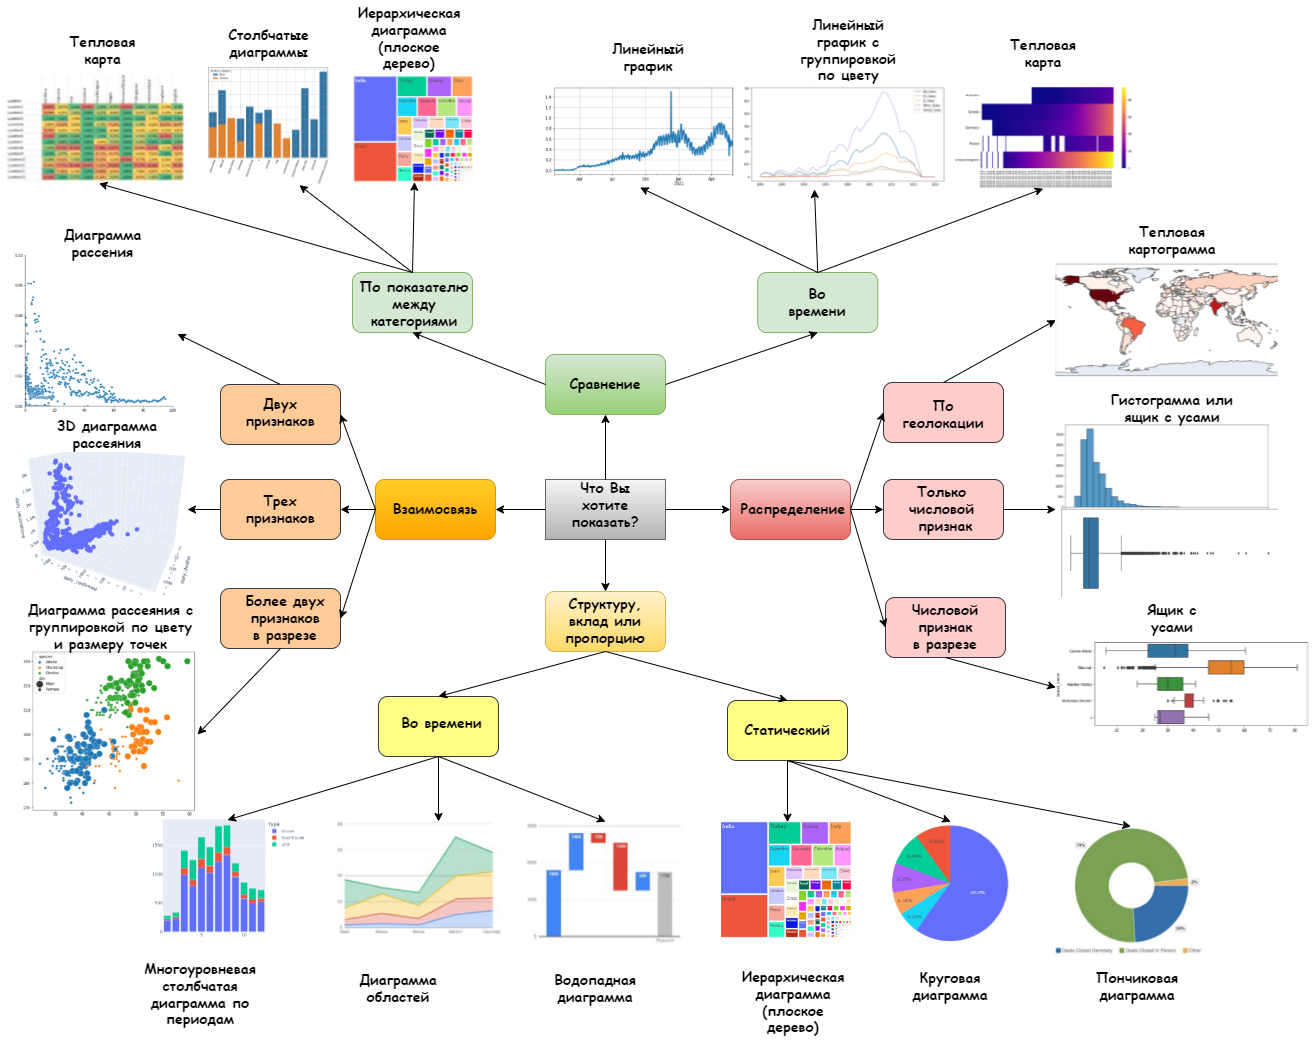

In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac